In [2]:
import visualization_tools as vt
import generator as gen
import numpy as np
from dataset import CoronalFieldDataset, CoronalFieldDatasetHDF
from matplotlib import pyplot as plt


/home/ubuntu/micromamba/envs/coronal-diffusion-modeling/lib/python3.12/site-packages/ai/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [12]:

def read_sh_coefficients(dataset_path, index):
    ds = CoronalFieldDataset(dataset_path)
    arr = ds[index]
    nmax = 90

    H = np.zeros((nmax + 1, nmax + 1))
    G = np.zeros((nmax + 1, nmax + 1))

    G[np.triu_indices(nmax + 1)] = arr[:arr.shape[0]//2]
    H[np.triu_indices(nmax + 1)] = arr[arr.shape[0]//2:]

    G = G.T 
    H = H.T
    
    return G, H, nmax

Text(0.5, 1.0, '$B_r$ at r=1.05 $R_\\odot$- Sample from Training Data')

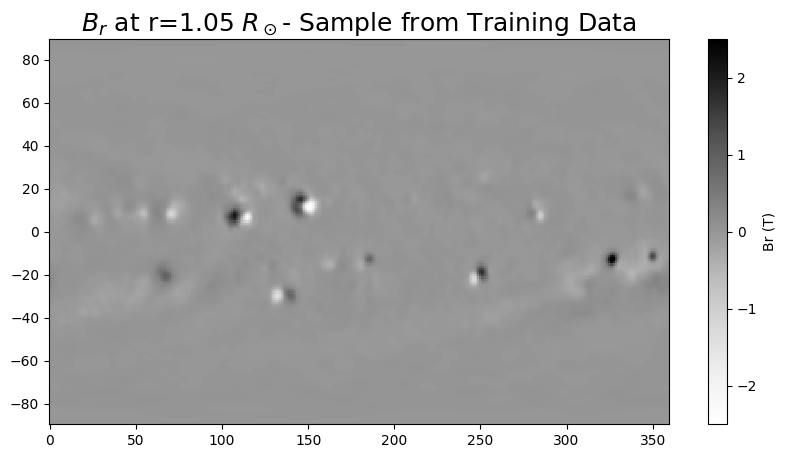

In [113]:
dataset_path = '/home/ubuntu/CoronalFieldExtrapolation/CoronalFieldExtrapolation_test/'
G, H, nmax = read_sh_coefficients(dataset_path, 0)


sh = vt.SHVisualizer(G, H, normalization="schmidt")  
#sh.visualize_field_lines(grid_density=20, r=1.1, closed_only=False)
sh.plot_magnetogram(r=1.05, lim=2.5)
plt.title(plt.gca().get_title() + f'- Sample from Training Data', fontsize=18)

Text(0.5, 1.0, '$B_r$ at r=1 $R_\\odot$- Sample from Diffusion Model')

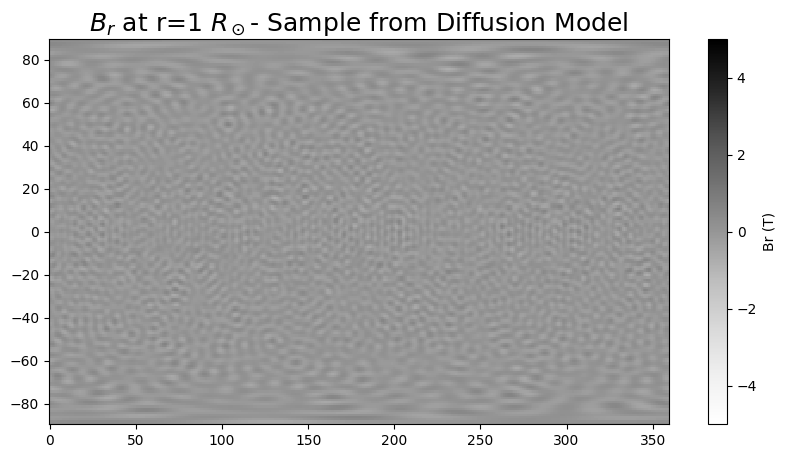

In [6]:
G, H = gen.sample(weights_file="checkpoints/magnetogram_8.pth", nsteps=10, radio_flux=1)
sh = vt.SHVisualizer(G, H)  
sh.plot_magnetogram(r=1)
plt.title(plt.gca().get_title() + f'- Sample from Diffusion Model', fontsize=18)

In [ ]:
ds =  CoronalFieldDatasetHDF('test_dataset.h5')


In [114]:
import importlib
import models


importlib.reload(models)
out, _ = ds[0]
model = models.MagnetogramModel()
magnetogram = model(out.unsqueeze(0), r=2.5)
magnetogram.shape

torch.Size([1, 180, 360])

/tmp/ipykernel_5871/605323005.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  lim = np.abs(magnetogram).max()


Text(0.5, 1.0, '$B_r$ at r=1 $R_\\odot$')

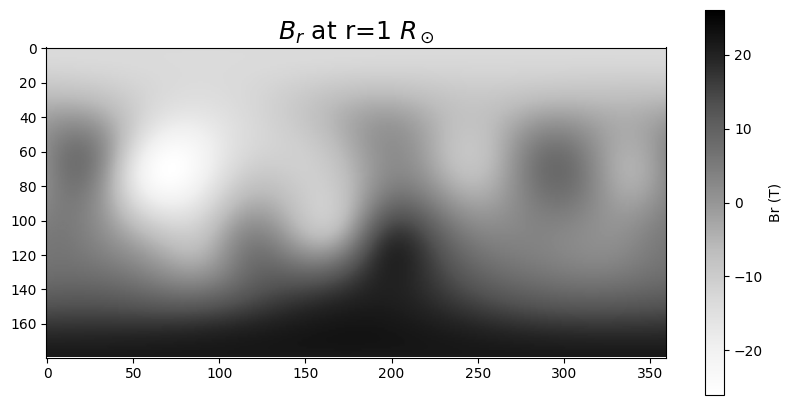

In [117]:
lim = np.abs(magnetogram).max()
plt.figure(figsize=(10, 5))
plt.imshow(magnetogram.squeeze(), cmap="Grays", vmax=lim, vmin=-lim)
plt.colorbar().set_label('Br (T)')
plt.title(f'$B_r$ at r=1 $R_\\odot$', fontsize=18)
